In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from typing import List, Tuple
from google.colab import drive

In [2]:
def split_sequence(seq: List[int], n_steps: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Split a univariate sequence into samples for supervised learning.

    Args:
        seq (List[int]): The input sequence.
        n_steps (int): The number of time steps to use as input.

    Returns:
        Tuple[np.ndarray, np.ndarray]: X (input) and y (output) arrays.
    """
    X, y = [], []
    for i in range(len(seq)):
        # Find the end of this pattern
        end_ix = i + n_steps
        # Check if we are beyond the sequence
        if end_ix > len(seq) - 1:
            break
        # Gather input and output parts of the pattern
        seq_x, seq_y = seq[i:end_ix], seq[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
# Define the input sequence
data: List[int] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print("Input sequence:", data)

Input sequence: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


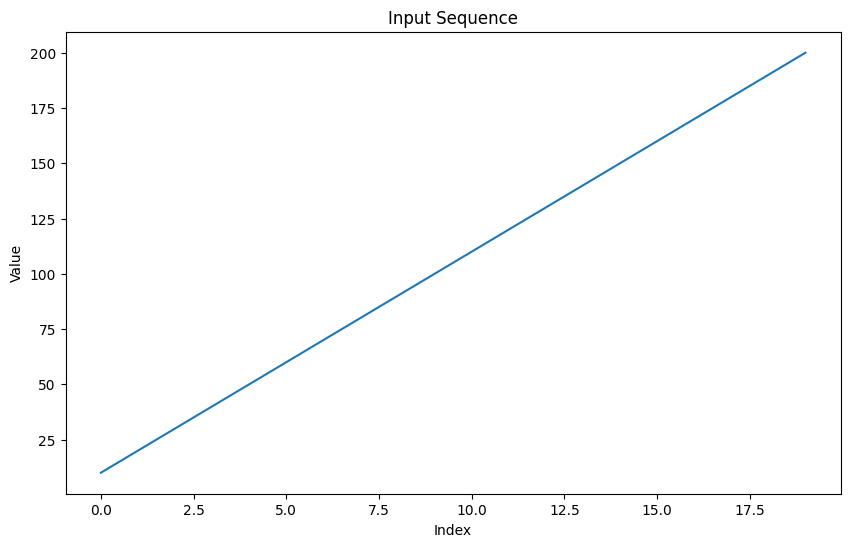

In [4]:
# Visualize the input sequence
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Input Sequence")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [5]:
# Define the number of time steps
n_steps: int = 7

In [6]:
# Split the sequence
X, y = split_sequence(data, n_steps)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (13, 7)
Shape of y: (13,)


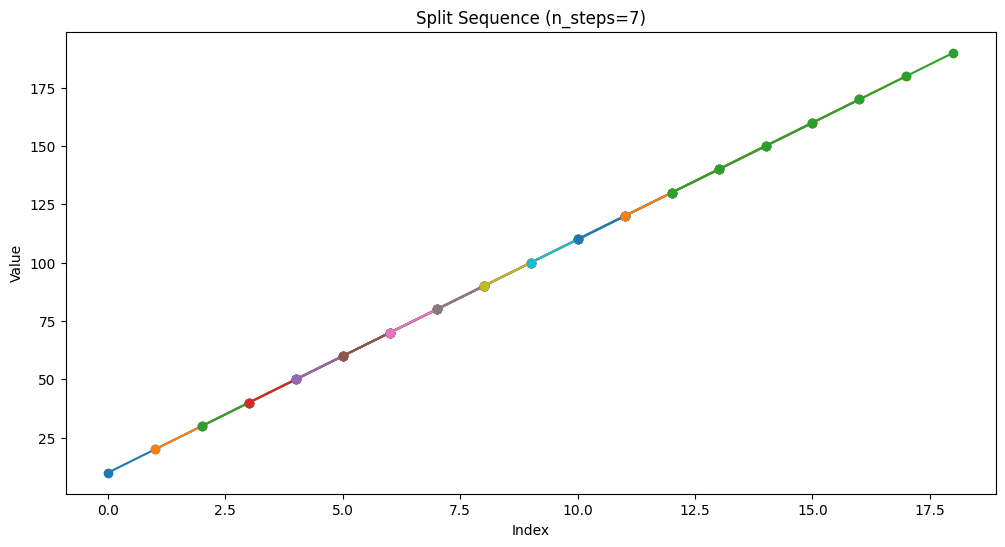

In [7]:
# Visualize the split sequence
plt.figure(figsize=(12, 6))
for i in range(len(X)):
    plt.plot(range(i, i + n_steps), X[i], marker='o')
plt.title(f"Split Sequence (n_steps={n_steps})")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [8]:
# Reshape input from [samples, timesteps] into [samples, timesteps, features]
n_features: int = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (13, 7, 1)


In [9]:
# Define the model
model = keras.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)),
    layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(0.01), loss=keras.losses.MeanSquaredError())

In [11]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    X, y,
    epochs=200,
    verbose=1,
    validation_split=0.2
)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 18520.5352 - val_loss: 27400.0605
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13323.6514 - val_loss: 15309.5234
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8136.9170 - val_loss: 137.5722
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1516.2328 - val_loss: 33767.4648
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7252.8662 - val_loss: 7889.2085
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1307.7986 - val_loss: 422.0727
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 333.8308 - val_loss: 50.8933
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 696.7205 - val_loss: 352.9911
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 983.6735 - val_loss: 434.6753
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 938.6562 - val_loss: 70.5176
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 360.3699 - val_loss: 2820.7488
Epoch 12/200
1/1 ━

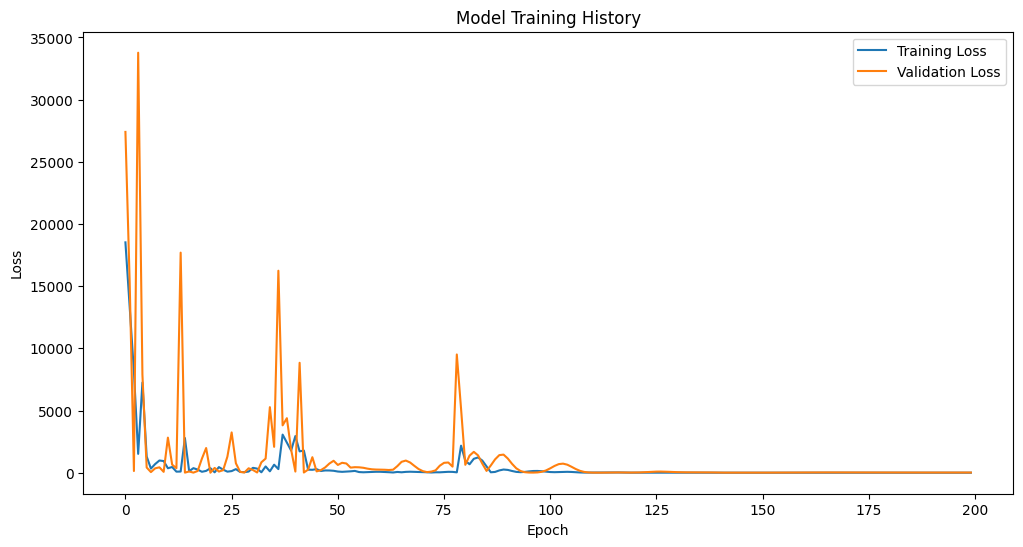

In [13]:
# Visualize the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Make a prediction
test_input = np.array([90, 100, 110, 120, 130, 140, 150])
test_input = test_input.reshape((1, n_steps, n_features))
predicted_value = model.predict(test_input)
print(f"Predicted next value: {predicted_value[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
Predicted next value: 160.00


In [15]:
# Save the model
model.save("/content/number_sequence_model.keras")

print("Model saved successfully.")

Model saved successfully.


In [16]:
# Function to generate future predictions
def generate_future_predictions(model: keras.Model, last_sequence: np.ndarray, num_predictions: int) -> List[float]:
    """
    Generate future predictions using the trained model.

    Args:
        model (keras.Model): The trained LSTM model.
        last_sequence (np.ndarray): The last known sequence of values.
        num_predictions (int): The number of future predictions to make.

    Returns:
        List[float]: A list of predicted future values.
    """
    future_predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(num_predictions):
        x_input = current_sequence.reshape((1, n_steps, n_features))
        predicted = model.predict(x_input)[0][0]
        future_predictions.append(predicted)
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = predicted

    return future_predictions

In [17]:
# Generate future predictions
last_known_sequence = np.array(data[-n_steps:])
future_predictions = generate_future_predictions(model, last_known_sequence, 10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


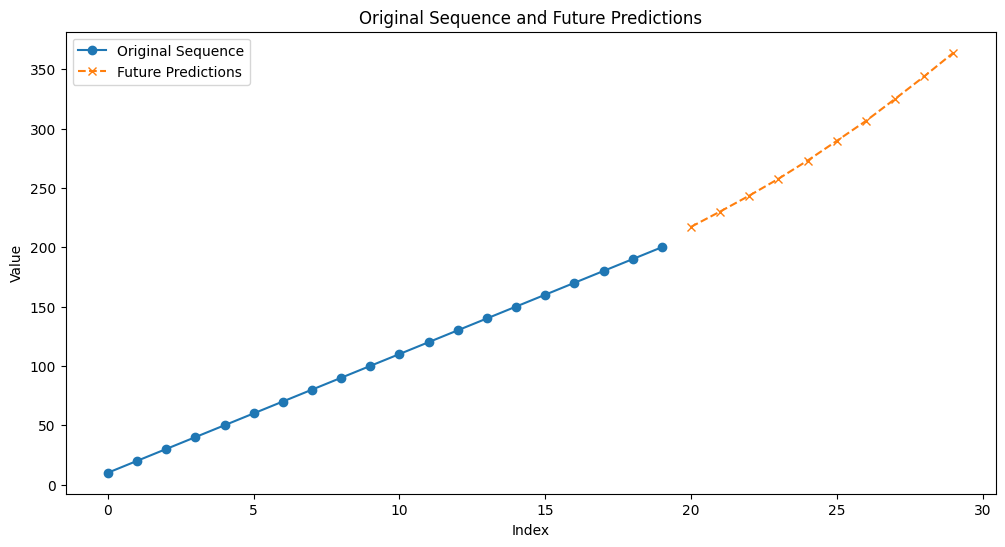

Future predictions: [217.17142, 230.07457, 243.48674, 257.66617, 273.03653, 289.5983, 306.4139, 325.00055, 343.96182, 363.89236]


In [18]:
# Visualize the original sequence and future predictions
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), data, label='Original Sequence', marker='o')
plt.plot(range(len(data), len(data) + len(future_predictions)), future_predictions, label='Future Predictions', marker='x', linestyle='--')
plt.title('Original Sequence and Future Predictions')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

print("Future predictions:", future_predictions)